# Data Mining Homework 3
## Question 6
### Mohammad Bahrami - 9724133

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part a

In [3]:
dataset = pd.read_csv('Iris.csv', index_col=0)
X = dataset.loc[:, dataset.columns != 'Class']
Y = dataset['Class']
dataset

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


In [4]:
from sklearn.preprocessing import StandardScaler
def KNNClassifier(X_train: pd.DataFrame, Y_train: pd.DataFrame | pd.Series, X_test: pd.DataFrame | pd.Series, K: int=5):
    X_train = X_train.copy()
    Y_train = Y_train.copy()
    scaler = StandardScaler().fit(X_train)
    X_train.loc[:, :] = scaler.transform(X_train)

    X_test_scaled = (X_test - scaler.mean_) / scaler.scale_
    distances = np.sqrt(((X_train - X_test_scaled)**2).sum(axis=1))
    KNN_indcs = distances.sort_values(ascending=True).iloc[:K].index
    vote = Y_train.loc[KNN_indcs].mean()
    return int(vote.round())

In [5]:
from sklearn.model_selection import LeaveOneOut
cv_gen = LeaveOneOut()
predictions = []
y_true = []
for train_indcs, test_idx in cv_gen.split(X):
    test_idx = test_idx.item()
    y_true.append(Y.loc[test_idx])
    predictions.append(KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx], K=5))
    # print(f'{Y.loc[test_idx]} - {KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx])}')

y_true = np.array(y_true)
predictions = np.array(predictions)
accuracy = (predictions == y_true).mean()
print(f'KNNClassifier Accuracy with K=5: {accuracy*100: .2f}%')

KNNClassifier Accuracy with K=5:  94.67%


### Part b

In [6]:
accuracies = []
errors = []
verbose=0
for k in range(1, 51):
    cv_gen = LeaveOneOut()
    predictions = []
    y_true = []
    for train_indcs, test_idx in cv_gen.split(X):
        test_idx = test_idx.item()
        y_true.append(Y.loc[test_idx])
        predictions.append(KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx], K=k))
        # print(f'{Y.loc[test_idx]} - {KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx])}')

    y_true = np.array(y_true)
    predictions = np.array(predictions)
    accuracy = (predictions == y_true).mean()
    error = 1 - accuracy
    accuracies.append(accuracy)
    errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
accuracies = np.array(accuracies)
errors = np.array(errors)

In [7]:
print(f'Minimum Error: {errors.min()}% at K: {errors.argmin() + 1}')

Minimum Error: 0.033333333333333326% at K: 13


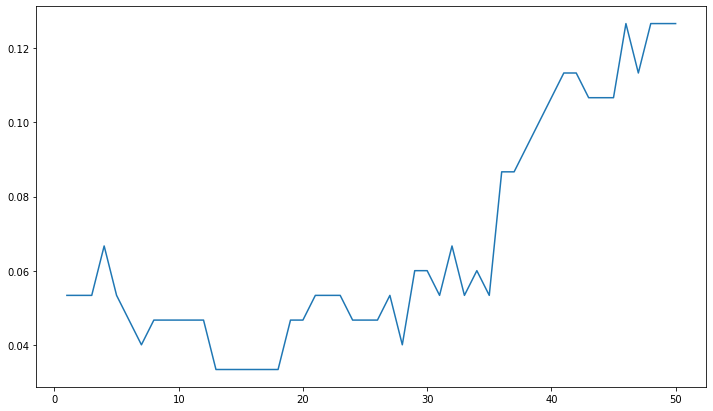

In [8]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 51),
    errors
)
fig.set_size_inches((12, 7))

### Part c

In [9]:
def WeightedKNNClassifier(X_train: pd.DataFrame, Y_train: pd.DataFrame | pd.Series, X_test: pd.DataFrame | pd.Series, K: int=5):
    X_train = X_train.copy()
    Y_train = Y_train.copy()
    scaler = StandardScaler().fit(X_train)
    X_train.loc[:, :] = scaler.transform(X_train)

    X_test_scaled = (X_test - scaler.mean_) / scaler.scale_
    distances = np.sqrt(((X_train - X_test_scaled)**2).sum(axis=1))
    KNN_indcs = distances.sort_values(ascending=True).iloc[:K].index
    # if distances.sort_values(ascending=True).iloc[:K].sum() != 0:
    vote = np.average(Y_train.loc[KNN_indcs], weights=1 / (distances.sort_values(ascending=True).iloc[:K] + 1e-5))
    # else:
    #     vote = Y_train.loc[KNN_indcs].mean()
    return int(vote.round())

In [10]:
cv_gen = LeaveOneOut()
predictions = []
y_true = []
for train_indcs, test_idx in cv_gen.split(X):
    test_idx = test_idx.item()
    y_true.append(Y.loc[test_idx])
    predictions.append(WeightedKNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx], K=5))
    # print(f'{Y.loc[test_idx]} - {KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx])}')

y_true = np.array(y_true)
predictions = np.array(predictions)
accuracy = (predictions == y_true).mean()
print(f'WeightedKNNClassifier Accuracy with K=5: {accuracy*100: .2f}%')

WeightedKNNClassifier Accuracy with K=5:  94.67%


In [11]:
weighted_accuracies = []
weighted_errors = []
verbose=0
for k in range(1, 51):
    cv_gen = LeaveOneOut()
    predictions = []
    y_true = []
    for train_indcs, test_idx in cv_gen.split(X):
        test_idx = test_idx.item()
        y_true.append(Y.loc[test_idx])
        predictions.append(WeightedKNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx], K=k))
        # print(f'{Y.loc[test_idx]} - {KNNClassifier(X.loc[train_indcs], Y.loc[train_indcs], X.loc[test_idx])}')

    y_true = np.array(y_true)
    predictions = np.array(predictions)
    accuracy = (predictions == y_true).mean()
    error = 1 - accuracy
    weighted_accuracies.append(accuracy)
    weighted_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
weighted_accuracies = np.array(weighted_accuracies)
weighted_errors = np.array(weighted_errors)

In [12]:
print(f'Minimum Error: {weighted_errors.min()}% at K: {weighted_errors.argmin() + 1}')

Minimum Error: 0.033333333333333326% at K: 7


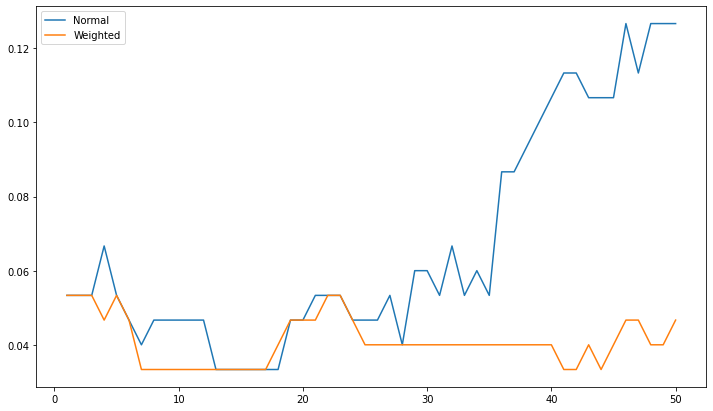

In [13]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 51),
    errors,
    label='Normal'
)
ax.plot(
    np.arange(1, 51),
    weighted_errors,
    label='Weighted'
)
ax.legend()
fig.set_size_inches((12, 7))

The Weighted Model is more resistent to increase of K. The Normal model is more prone to over-fit in bigger values of K. They have similar performance at lower K values.